In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# lendo os dataframes
df_train = pd.read_csv("/content/drugsComTrain_raw.csv")
df_test = pd.read_csv("/content/drugsComTest_raw.csv")

In [5]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [6]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
# juntando os dataframes de teste e treino em um só
df = pd.concat([df_train,df_test])

In [12]:
df.shape

(215063, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


<ipython-input-55-9cf229d5dd11>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_counts.values, y=condition_counts.index, palette="viridis")


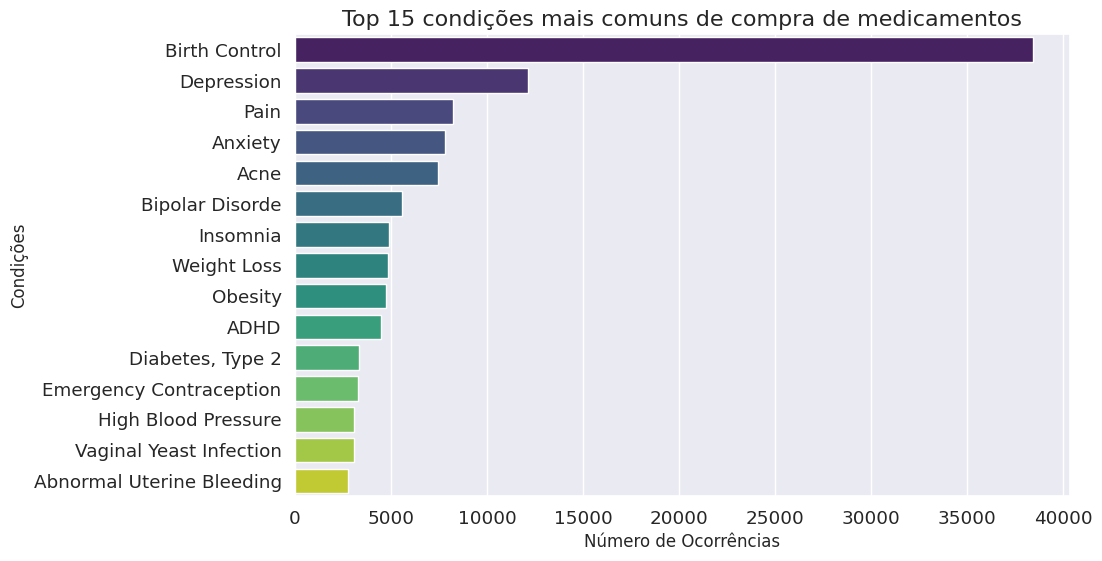

In [55]:
# Visualização dos dados
# Condições mais comuns nas compras de medicamentos
condition_counts = df['condition'].value_counts().nlargest(15)

# gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=condition_counts.values, y=condition_counts.index, palette="viridis")

# título e rótulos
plt.title('Top 15 condições mais comuns de compra de medicamentos', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Condições', fontsize=12)

plt.show()

<ipython-input-31-799c531d27fc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')


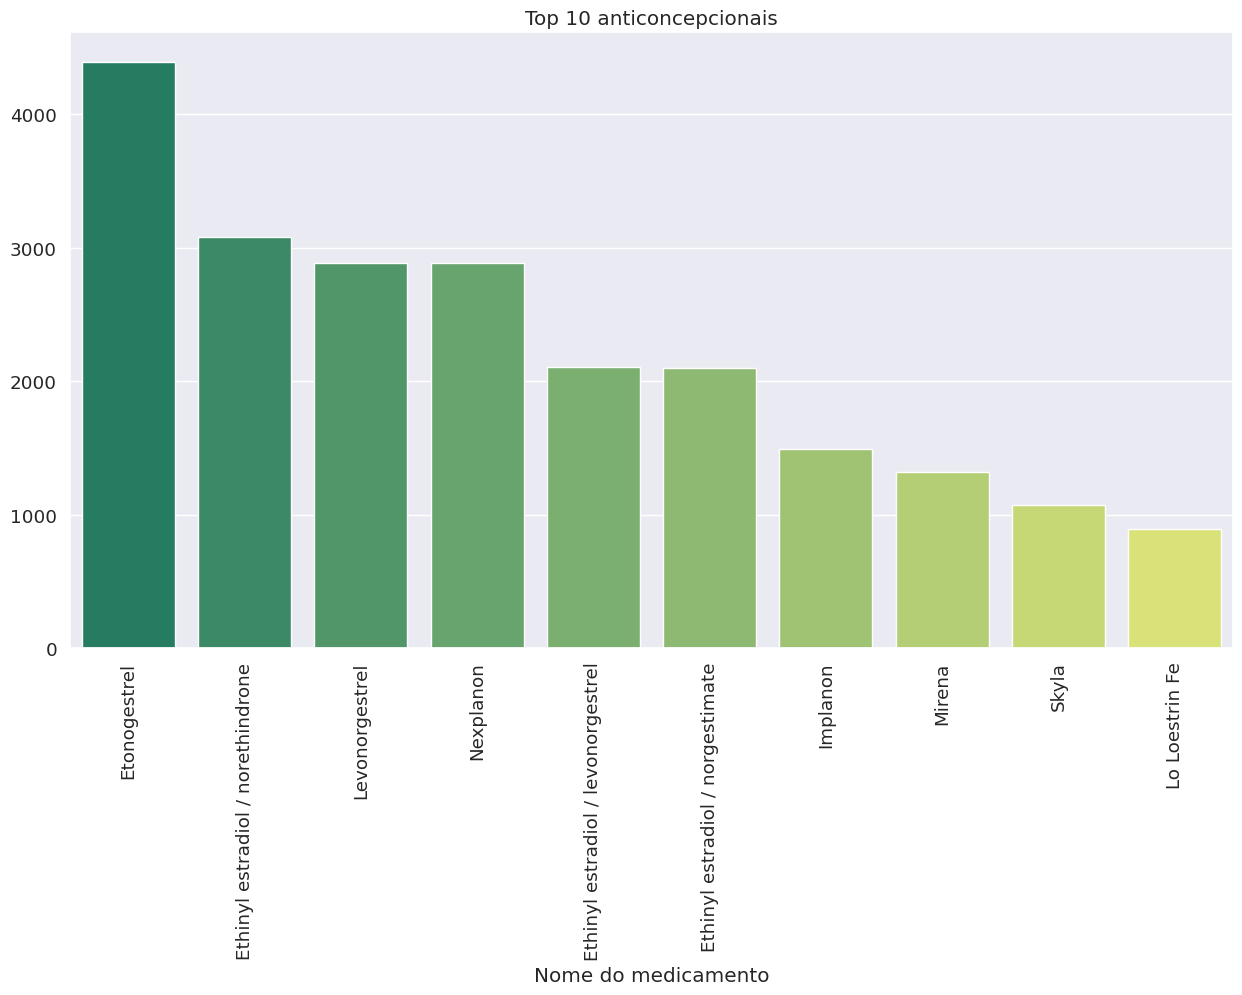

In [31]:
# Visualizando os remémdios mais usados como birth control
df1 = df[df['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Nome do medicamento')
sns_.set_title("Top 10 anticoncepcionais")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<ipython-input-56-06e170ef2418>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_rating_by_condition.values, y=mean_rating_by_condition.index, palette="coolwarm")


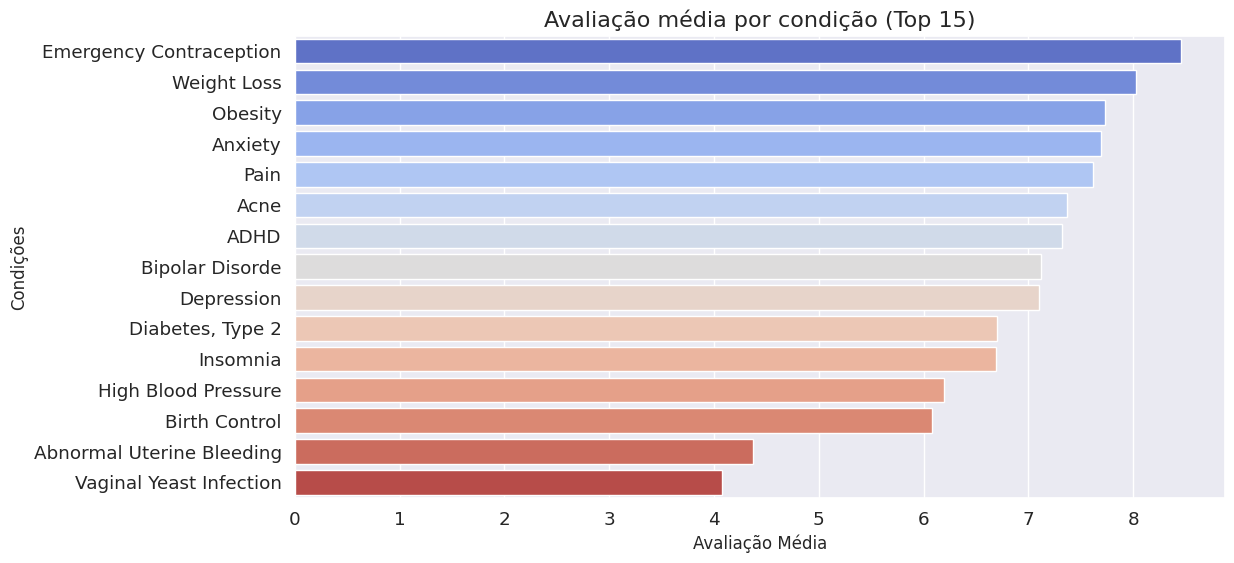

In [56]:
# Obter as 15 condições mais comuns
top_conditions = df['condition'].value_counts().nlargest(15).index

# Filtrar o DataFrame para incluir apenas as 15 condições mais comuns
filtered_df = df[df['condition'].isin(top_conditions)]

# Calcular a avaliação média por condição
mean_rating_by_condition = filtered_df.groupby('condition')['rating'].mean().sort_values(ascending=False)

# Configurar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_rating_by_condition.values, y=mean_rating_by_condition.index, palette="coolwarm")

# Adicionar título e rótulos
plt.title('Avaliação média por condição (Top 15)', fontsize=16)
plt.xlabel('Avaliação Média', fontsize=12)
plt.ylabel('Condições', fontsize=12)

# Exibir o gráfico
plt.show()

<ipython-input-57-f332c18bb599>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_drug_counts.values, y=condition_drug_counts.index, palette="viridis")


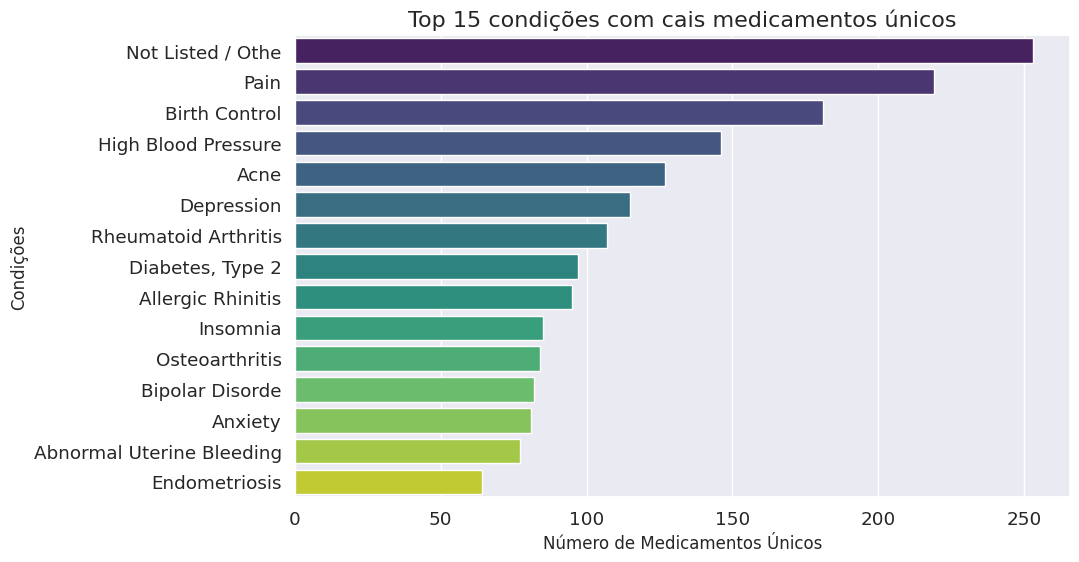

In [57]:
# contagem de quantos medicamentos únicos existem por condição
condition_drug_counts = df.groupby('condition')['drugName'].nunique().nlargest(15)

plt.figure(figsize=(10,6))
sns.barplot(x=condition_drug_counts.values, y=condition_drug_counts.index, palette="viridis")

plt.title('Top 15 condições com cais medicamentos únicos', fontsize=16)
plt.xlabel('Número de Medicamentos Únicos', fontsize=12)
plt.ylabel('Condições', fontsize=12)

plt.show()

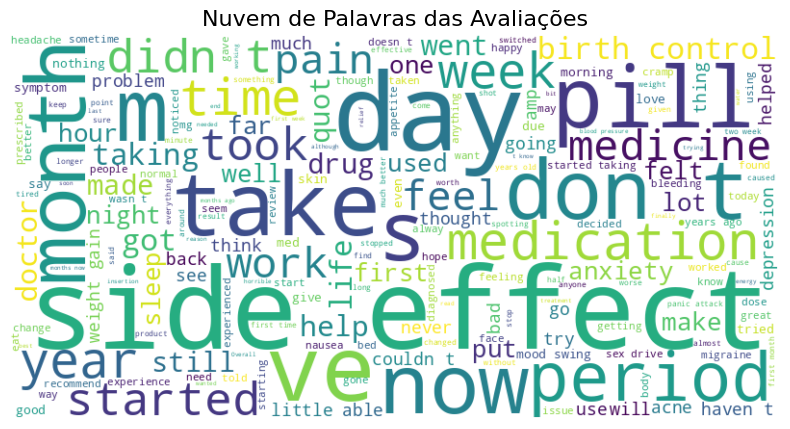

In [19]:
# nuvem de palavras de palavras que mais aparecem nas reviews
from wordcloud import WordCloud

text = ' '.join(review for review in df['review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Avaliações', fontsize=16)
plt.show()

In [35]:
# criando uma nova coluna e separando as reviews >= 5 e < 5
df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

# contagem de cada valor
df['Review_Sentiment'].value_counts()

,count
Review_Sentiment,
1.0,161491
0.0,53572


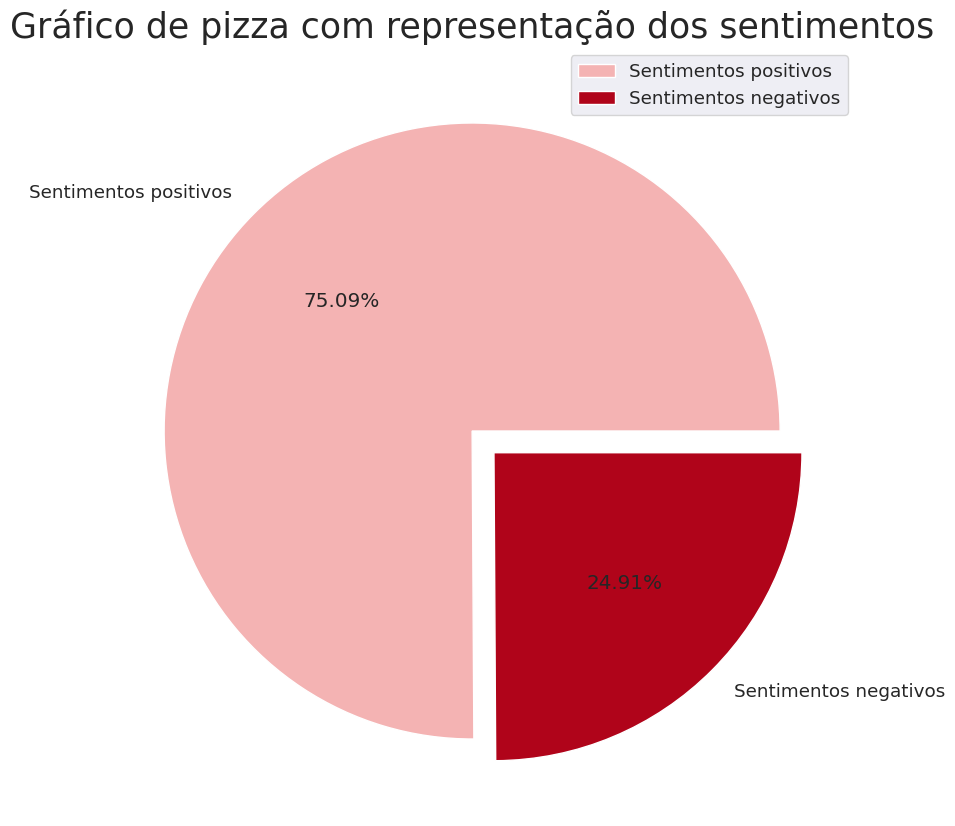

In [40]:
# gráfico de pizza sobre sentimentos negativos e positivos das reviews
size = [161491, 53572]
colors = ['#F4B3B3', '#B0041A']
labels = "Sentimentos positivos","Sentimentos negativos"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Gráfico de pizza com representação dos sentimentos', fontsize = 25)
plt.legend()
plt.show()

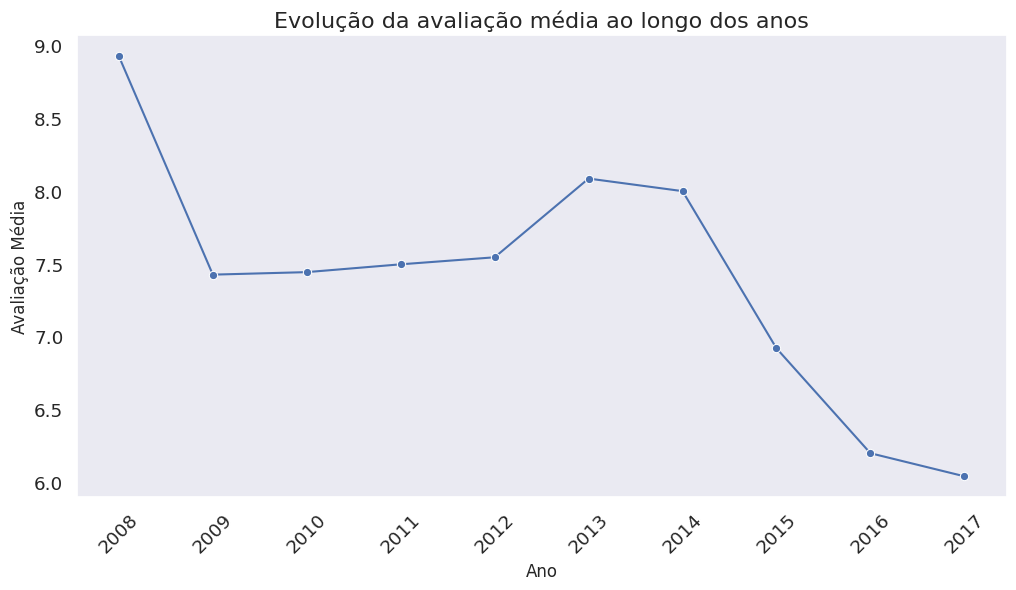

In [58]:
# Converter a coluna 'date' para o formato de data
df['date'] = pd.to_datetime(df['date'])

# pegar o ano da data
df['year'] = df['date'].dt.year

# média das avaliações por ano
mean_rating_by_year = df.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_rating_by_year, marker='o')

plt.title('Evolução da avaliação média ao longo dos anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

plt.xticks(mean_rating_by_year.index, rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid()
plt.show()

<ipython-input-41-5443728ebae9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'flare')


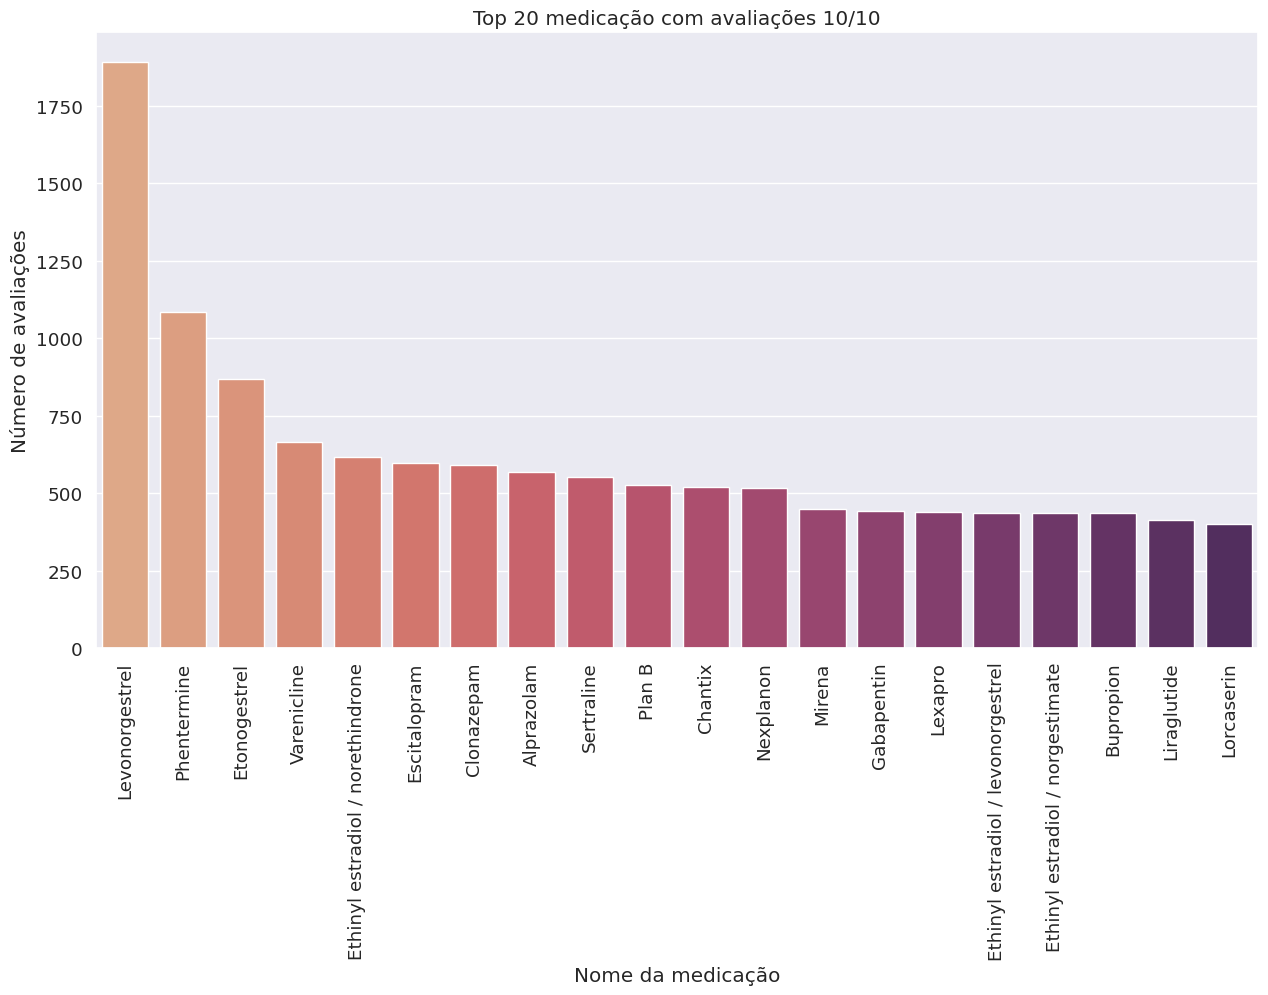

In [41]:
# medicações com as melhores avaliações 10/10
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'flare')

sns_rating.set_title('Top 20 medicação com avaliações 10/10')
sns_rating.set_ylabel("Número de avaliações")
sns_rating.set_xlabel("Nome da medicação")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ipython-input-30-74d515fe11fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')


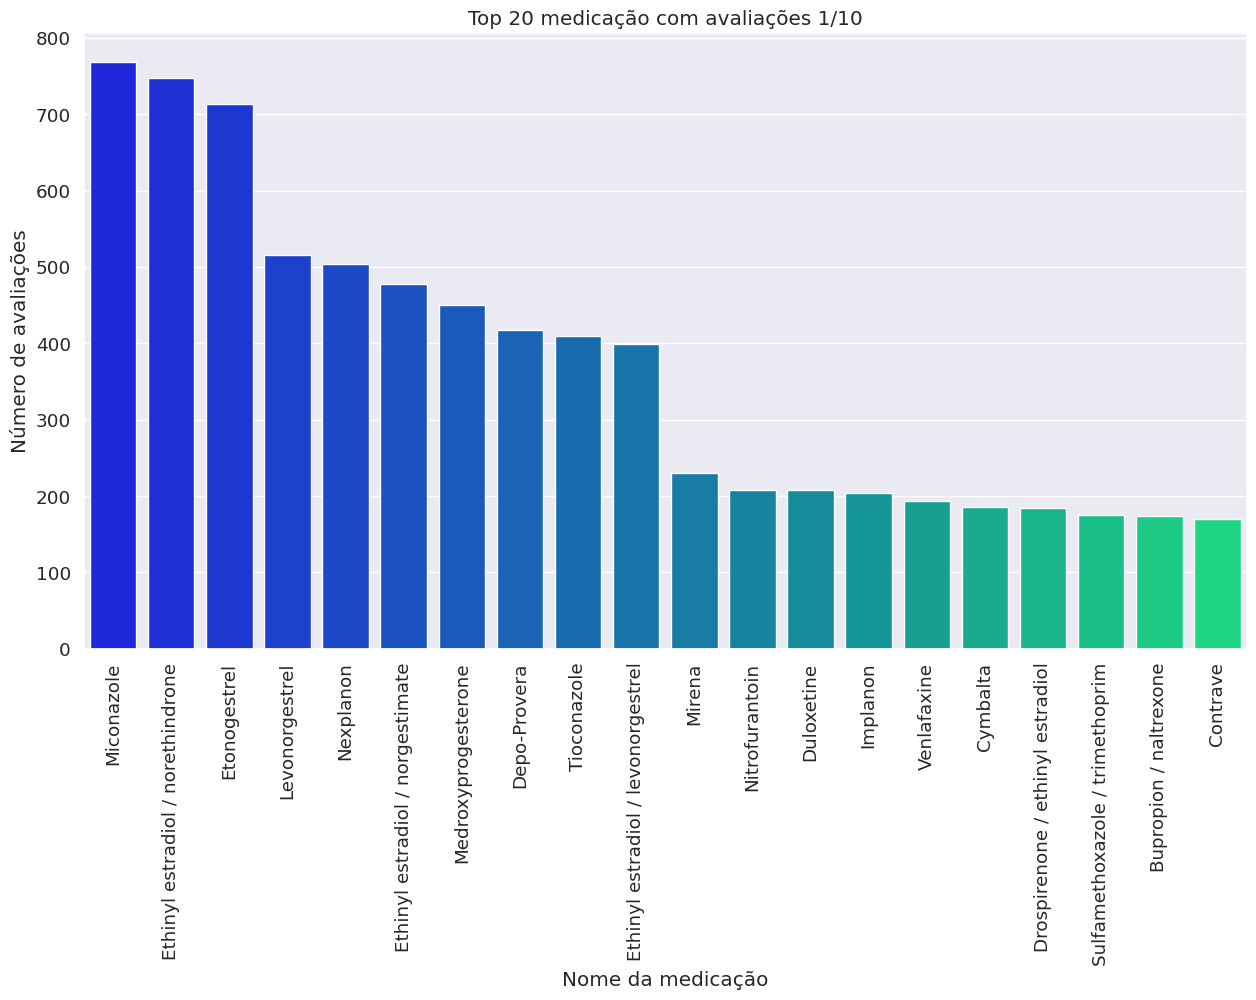

In [30]:
# medicações com as piores avaliações 1/10
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df.loc[df.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 medicação com avaliações 1/10')
sns_rating.set_ylabel("Número de avaliações")
sns_rating.set_xlabel("Nome da medicação")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 1.0, 'Contagem de valores de avaliação')

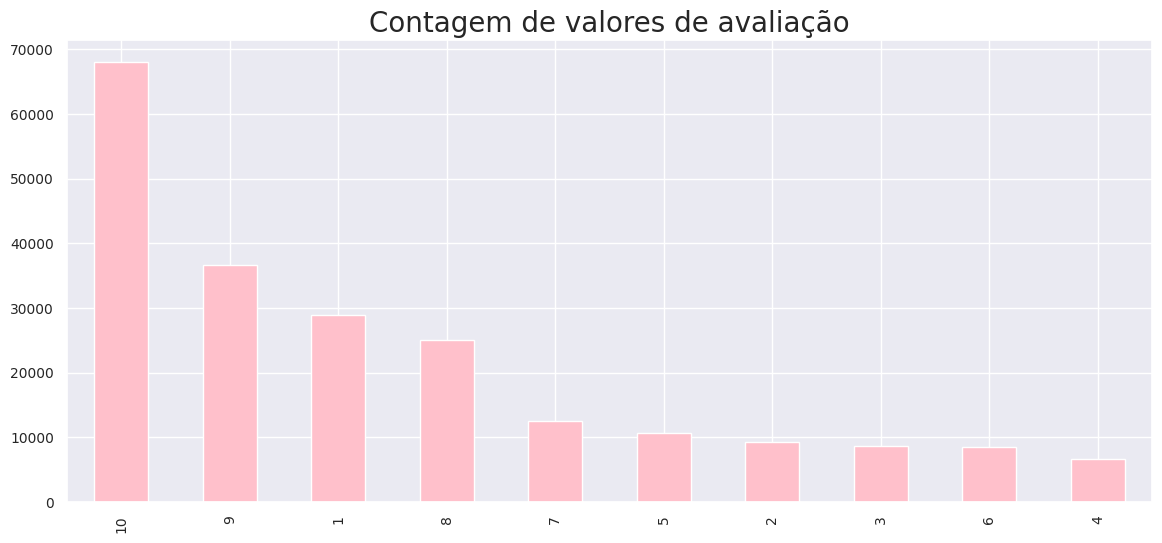

In [54]:
# contagem das avaliações para cada nota
rating = df['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="pink")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Contagem de valores de avaliação", fontsize = 20)